# **UNDERSTANDING & APPLYING LOGISTIC REGRESSION**
Logistic Regression is a Machine Learning **classification** algorithm that is used to predict the probability of a **categorical** dependent variable. In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.). In other words, the logistic regression model predicts P(Y=1) as a function of X.

In [13]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing


# **1. Loading the data**

In [3]:
# Read the dataset directly from the repository
data = pd.read_csv("https://raw.githubusercontent.com/madmashup/targeted-marketing-predictive-engine/master/banking.csv")
data.dropna()
print(data.shape)
print(data.columns)

(41188, 21)
Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')


In [5]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,210,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,137,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


// limpiar las categorias de cada columna

In [6]:
data['education'].unique()

array(['basic.4y', 'unknown', 'university.degree', 'high.school',
       'basic.9y', 'professional.course', 'basic.6y', 'illiterate'],
      dtype=object)

In [10]:
data['education'] = np.where(data['education'] == 'basic.4y', 'basic', data['education'])
data['education'] = np.where(data['education'] == 'basic.6y', 'basic', data['education'])
data['education'] = np.where(data['education'] == 'basic.9y', 'basic', data['education'])
data['education'].unique()

array(['basic', 'unknown', 'university.degree', 'high.school',
       'professional.course', 'illiterate'], dtype=object)

# **2. Data Exploration**

In [11]:
data['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

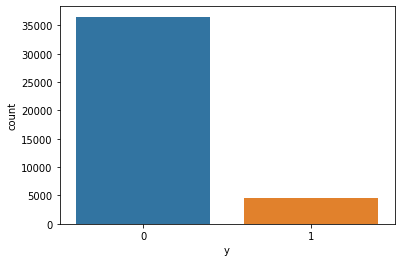

<Figure size 432x288 with 0 Axes>

In [15]:
sns.countplot(x = 'y', data=data)
plt.show()
plt.savefig('Class Counter')

In [19]:
count_no_subscription = len(data[data['y'] == 0])
count_subscription = len(data[data['y'] == 1])

per_cns = count_no_subscription/(count_no_subscription + count_subscription)
per_cs = count_subscription/(count_no_subscription + count_subscription)

print("Percentage of people non subscribed: {}".format(per_cns))
print("Percentage of people subscribed: {}".format(per_cs))

Percentage of people non subscribed: 0.8873458288821987
Percentage of people subscribed: 0.11265417111780131


class imbalanced

In [21]:
data.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


## **2.1 Visualization**

Text(0, 0.5, 'Frecuency of Purchase')

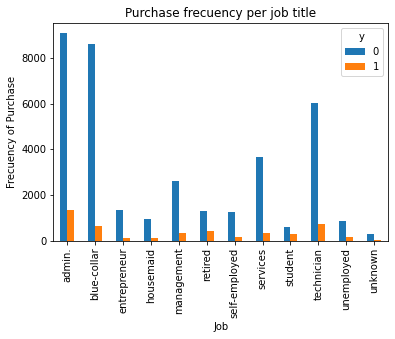

In [64]:
%matplotlib inline
pd.crosstab(data.job, data.y).plot(kind = 'bar')
plt.title ('Purchase frecuency per job title')
plt.xlabel('Job')
plt.ylabel('Frecuency of Purchase')

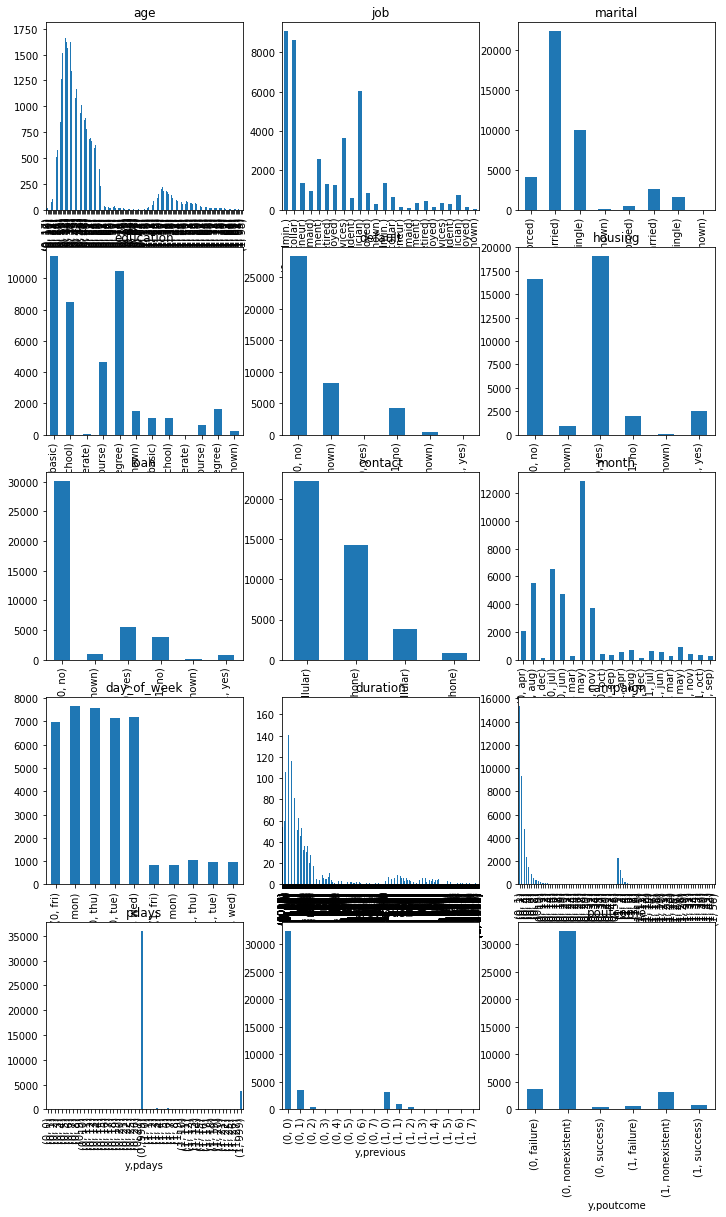

In [74]:


fig, axes = plt.subplots(5,3,figsize=(12,20))
axes = axes.flatten()

for col, ax in zip(data.columns, axes):
  ct = pd.crosstab(data[col], data.y)
  ax.set_title(col)
  ct.unstack().plot.bar(ax=ax, stacked=True)

